In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns

# 1. Data Treating

In [3]:
data = pd.read_csv('./coursework_1_data_2019.csv')
data.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [4]:
# rename because python var name cannot use number as beginning
data.columns = ['local_authority_area', 'cases_total_2008', 'cases_total_2013',
       'cases_total_2018', 'pop_total_2008', 'pop_total_2013',
       'pop_total_2018', 'cases_male_2008', 'cases_male_2013',
       'cases_male_2018', 'pop_male_2008', 'pop_male_2013', 'pop_male_2018',
       'cases_female_2008', 'cases_female_2013', 'cases_female_2018',
       'pop_female_2008', 'pop_female_2013', 'pop_female_2018', 'total_budget',
       'clean_air', 'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling', 'region', 'local_authority_type']

In [5]:
# case ratio on population
data = (data.assign(cases_total_ratio_2008 = data.cases_total_2008/data.pop_total_2008,
                    cases_total_ratio_2018 = data.cases_total_2018/data.pop_total_2018,
                    cases_male_ratio_2008 = data.cases_male_2008/data.pop_male_2008,
                    cases_male_ratio_2018 = data.cases_male_2018/data.pop_male_2018,
                    cases_female_ratio_2008 = data.cases_female_2008/data.pop_female_2008,
                    cases_female_ratio_2018 = data.cases_female_2018/data.pop_female_2018))

In [6]:
## difference between 2008 and 2018
data = (data.assign(ttl_case_diff = data.cases_total_ratio_2008-data.cases_total_ratio_2018,
                    male_case_diff = data.cases_male_ratio_2008-data.cases_male_ratio_2018,
                    female_case_diff = data.cases_female_ratio_2008-data.cases_female_ratio_2018,
                   ))

In [7]:
## proportion of budget
data = (data.assign(clean_air_por = data.clean_air/data.total_budget,
                    clean_environ_por = data.clean_environ/data.total_budget,
                    health_training_por = data.health_training/data.total_budget,
                    school_awareness_por = data.school_awareness/data.total_budget,
                    media_awareness_por = data.media_awareness/data.total_budget,
                    sub_counselling_por = data.sub_counselling/data.total_budget,
                   ))

In [8]:
data = data.drop(['local_authority_area'], axis=1)
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   cases_total_2008                              152 non-null    int64  
 1   cases_total_2013                              152 non-null    int64  
 2   cases_total_2018                              152 non-null    int64  
 3   pop_total_2008                                152 non-null    int64  
 4   pop_total_2013                                152 non-null    int64  
 5   pop_total_2018                                152 non-null    int64  
 6   cases_male_2008                               152 non-null    int64  
 7   cases_male_2013                               152 non-null    int64  
 8   cases_male_2018                               152 non-null    int64  
 9   pop_male_2008                                 152 non-null    int

In [9]:
data.head()

,cases_total_2008,cases_total_2013,cases_total_2018,pop_total_2008,pop_total_2013,pop_total_2018,cases_male_2008,cases_male_2013,cases_male_2018,pop_male_2008,...,region_North West,region_South East,region_South West,region_West Midlands,region_Yorkshire and the Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_other_london,local_authority_type_unitary_authority
0,593,619,763,172684,179030,181779,187,190,230,83890,...,0,0,0,0,0,1,0,0,0,0
1,539,594,773,340435,344062,355955,212,204,292,169060,...,0,0,0,0,0,1,0,0,0,0
2,360,451,527,226755,244010,257883,148,186,212,110384,...,0,0,0,0,1,0,1,0,0,0
3,456,421,494,178625,172975,189334,157,129,156,87026,...,0,0,1,0,0,0,0,0,0,1
4,311,327,367,158185,164807,170463,138,145,156,75929,...,0,0,0,0,0,0,0,0,0,1


In [10]:
data.columns

Index(['cases_total_2008', 'cases_total_2013', 'cases_total_2018',
       'pop_total_2008', 'pop_total_2013', 'pop_total_2018', 'cases_male_2008',
       'cases_male_2013', 'cases_male_2018', 'pop_male_2008', 'pop_male_2013',
       'pop_male_2018', 'cases_female_2008', 'cases_female_2013',
       'cases_female_2018', 'pop_female_2008', 'pop_female_2013',
       'pop_female_2018', 'total_budget', 'clean_air', 'clean_environ',
       'health_training', 'school_awareness', 'media_awareness',
       'sub_counselling', 'cases_total_ratio_2008', 'cases_total_ratio_2018',
       'cases_male_ratio_2008', 'cases_male_ratio_2018',
       'cases_female_ratio_2008', 'cases_female_ratio_2018', 'ttl_case_diff',
       'male_case_diff', 'female_case_diff', 'clean_air_por',
       'clean_environ_por', 'health_training_por', 'school_awareness_por',
       'media_awareness_por', 'sub_counselling_por', 'region_East Midlands',
       'region_East of England', 'region_London', 'region_North East',
       

# 2. Data Visualisation

# 2.1 Hypothesis Testing

In [11]:
# import relevant packages

import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# UNCOMMENT THE FOLLOWING IF USING GOOGLE COLAB
#from google.colab import files
#uploaded = files.upload()

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
data_filename = 'coursework_1_data_2019.csv'

data_sample=data[['cases_total_ratio_2008','cases_total_ratio_2018']]
data_sample.head()

,cases_total_ratio_2008,cases_total_ratio_2018
0,0.003434,0.004197
1,0.001583,0.002172
2,0.001588,0.002044
3,0.002553,0.002609
4,0.001966,0.002153


In [12]:
# For convenience...

# Store each sample separately:
data1 = data_sample['cases_total_ratio_2008']
data2 = data_sample['cases_total_ratio_2018']

# Store some useful values

min1 = data1.min()
min2 = data2.min()

max1 = data1.max()
max2 = data2.max()

mean1 = data1.mean()
mean2 = data2.mean()

std1 = data1.std()
std2 = data2.std()

n1 = len(data1)
n2 = len(data2)

# And print some summary information:

data_sample.describe()

,cases_total_ratio_2008,cases_total_ratio_2018
count,152.000000,152.000000
mean,0.003097,0.003447
std,0.001371,0.001387
min,0.000740,0.001014
25%,0.002148,0.002535
50%,0.002915,0.003182
75%,0.003650,0.004067
max,0.008241,0.008729


<AxesSubplot:>

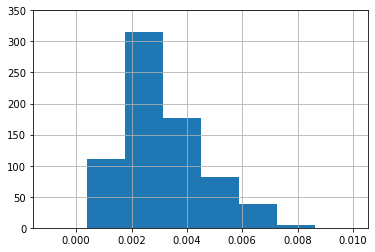

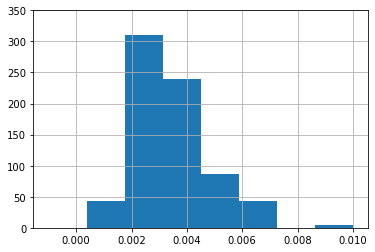

In [24]:
# Visualise the distribution of the data (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 0.001
hist_max = int(max(max1,max2)) + 0.01
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
y_range = [0.0,350]

# Choose an appropriate number of columns for the histogram:
# (This choice will give us columns of width 1)
n_cols = 8

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

plt.figure(1)
data_sample['cases_total_ratio_2008'].hist(range=x_range, bins=n_cols, density=True)
plt.ylim(y_range)

plt.figure(2)
plt.ylim(y_range)
data_sample['cases_total_ratio_2018'].hist(range=x_range, bins=n_cols, density=True)


In [14]:
alpha = 0.05

std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 0.9880741194884953
Can assume equal population standard deviations.


In [15]:
test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

p-value = 0.027888280286753903


In [16]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


# 2.2 KS Distribution Test

In [17]:
alpha = 0.05
# There is a built-in scipy.stats function (ks_2samp) that does steps 3 and 4 for us:

KS_stat, p_value = sps.ks_2samp(data1,data2)

# Compare with the KS stat we calculated earlier:

print("KS stat =", KS_stat)
print("p-value =", p_value)

KS stat = 0.17105263157894737
p-value = 0.02325225501139328


In [18]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different distributions.


# 2.3 Cases Total Comparison

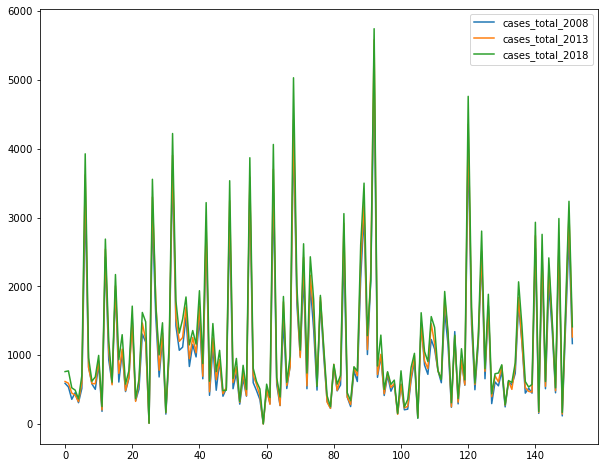

In [19]:
plt.figure(figsize=(10,8))
plt.plot('cases_total_2008', data = data,label='cases_total_2008')
plt.plot('cases_total_2013', data = data,label='cases_total_2013')
plt.plot('cases_total_2018', data = data,label='cases_total_2018')
plt.legend()

<AxesSubplot:>

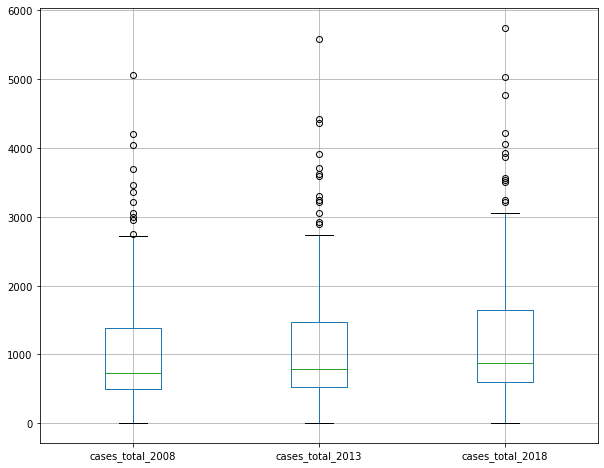

In [20]:
plt.figure(figsize=(10,8))
data[['cases_total_2008','cases_total_2013','cases_total_2018']].boxplot()

# 2.4 Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

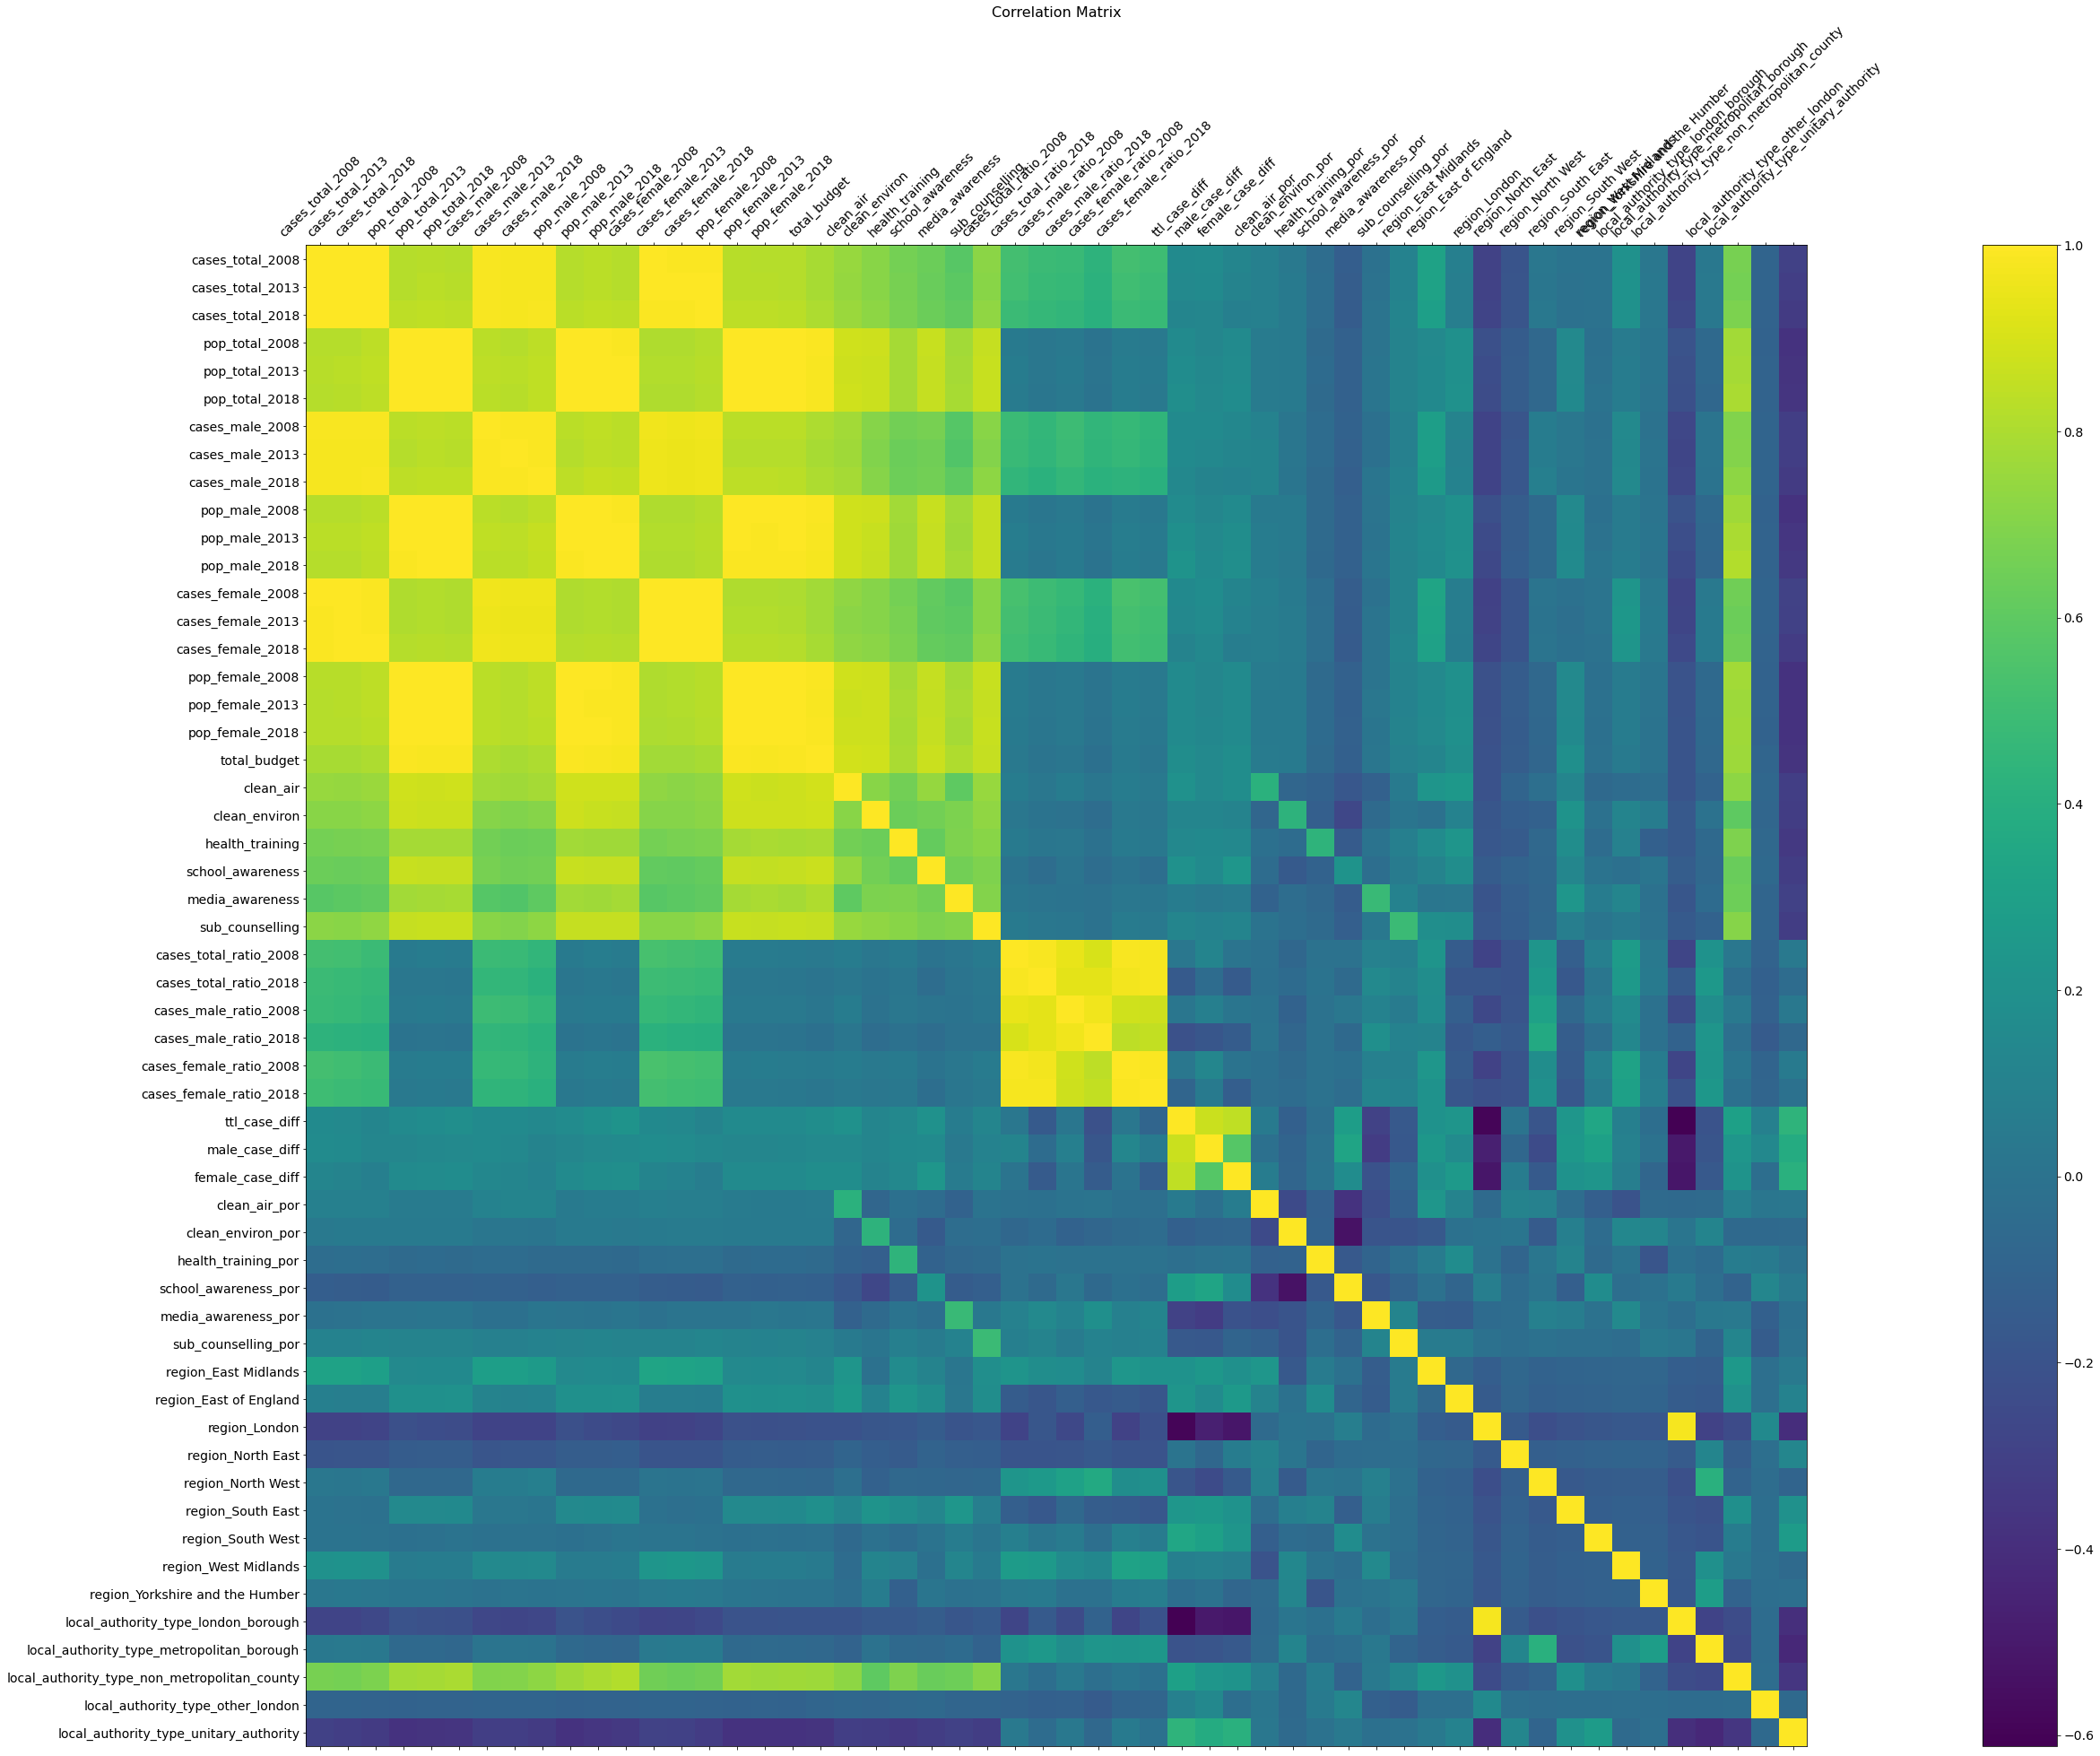

In [21]:
df = data
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(70, 30))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# 3. VIF Checking


In [22]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(data, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        data_with_const = add_constant(data)

        vif_data = pd.Series([variance_inflation_factor(data_with_const.values, i) 
               for i in range(data_with_const.shape[1])], name= "VIF",
              index=data_with_const.columns).to_frame()

        # drop the const
        vif_data = vif_data.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_data.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_data.index[vif_data.VIF == vif_data.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            data = data.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return data

In [23]:
# using VIF on the bike_rental dataset

data_predictors_selected_VIF = drop_column_using_vif_(data.drop('ttl_case_diff', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(data_predictors_selected_VIF.columns)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: cases_total_2008
Dropping: cases_total_2013
Dropping: cases_total_2018
Dropping: pop_total_2008
Dropping: pop_total_2013
Dropping: pop_total_2018
Dropping: total_budget
Dropping: cases_male_ratio_2008
Dropping: clean_air_por
Dropping: cases_female_ratio_2018
Dropping: region_East Midlands
Dropping: region_London
Dropping: local_authority_type_london_borough
Dropping: cases_total_ratio_2008
Dropping: pop_female_2008
Dropping: cases_total_ratio_2018
Dropping: cases_female_2018
Dropping: pop_male_2008
Dropping: pop_male_2013
Dropping: pop_female_2013
Dropping: cases_male_2018
Dropping: cases_female_2008
Dropping: pop_female_2018
Dropping: cases_male_2008
Dropping: pop_male_2018
Dropping: cases_female_2013
Dropping: local_authority_type_unitary_authority
Dropping: clean_air
Dropping: sub_counselling
Dropping: media_awareness
Dropping: cases_male_2013
Dropping: clean_environ
Dropping: cases_female_ratio_2008
The columns remaining after VIF selection are:
Index(['health_training', 

# 4. Model Building

In [25]:
X = data[['clean_environ_por',
       'health_training_por', 'school_awareness_por', 'media_awareness_por',
       'sub_counselling_por', 'region_East of England', 'region_North East',
       'region_North West', 'region_South East', 'region_South West',
       'region_West Midlands', 'region_Yorkshire and the Humber',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_other_london']]
regression_model = sm.OLS(endog= data['ttl_case_diff'], exog=sm.add_constant(X)).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ttl_case_diff   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     16.53
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           8.43e-24
Time:                        02:01:16   Log-Likelihood:                 1123.2
No. Observations:                 152   AIC:                            -2214.
Df Residuals:                     136   BIC:                            -2166.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.0001      0.000     -1.119      0.265      -0.000       0.000
clean_environ_por                               -0.0005      0.000     -2.807      0.006      -0.001      -0.000
health_training_por                             -0.0006      0.000     -1.728      0.086      -0.001    8.62e-05
school_awareness_por                             0.0003      0.000      1.563      0.120   -7.47e-05       0.001
media_awareness_por                             -0.0016      0.000     -5.971      0.000      -0.002      -0.001
sub_counselling_por                             -0.0013      0.000     -2.982      0.003      -0.002      -0.000
region_East of England                           0.0004   5.59e-05      6.321      0.000       0.000       0.000
region_North East                                0.0003    5.5e-05      4.644      0.000       0.000       0.000
region_North West                                0.0002      5e-05      3.355      0.001    6.88e-05       0.000
region_South East                                0.0004   4.57e-05      8.254      0.000       0.000       0.000
region_South West                                0.0004   4.77e-05      8.642      0.000       0.000       0.001
region_West Midlands                             0.0004   5.52e-05      6.804      0.000       0.000       0.000
region_Yorkshire and the Humber                  0.0003   5.48e-05      4.827      0.000       0.000       0.000
local_authority_type_metropolitan_borough       -0.0001   4.19e-05     -2.591      0.011      -0.000   -2.57e-05
local_authority_type_non_metropolitan_county     0.0001   3.69e-05      3.151      0.002    4.33e-05       0.000
local_authority_type_other_london                0.0002      0.000      1.352      0.178      -0.000       0.001
==============================================================================
Omnibus:                       30.605   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.025
Skew:                           0.854   Prob(JB):                     1.69e-15
Kurtosis:                       5.797   Cond. No.                         40.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Model Diagosing

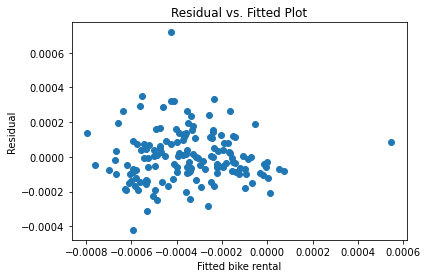

In [26]:
# plot 
plt.scatter(regression_model.fittedvalues, regression_model.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

In [27]:
results = pd.DataFrame({'index': data.ttl_case_diff,
                        'resids': regression_model.resid,
                        'std_resids': regression_model.resid_pearson,
                        'fitted': regression_model.fittedvalues
                       })
print(results.head()) 

      index    resids  std_resids    fitted
0 -0.000763 -0.000153   -0.965866 -0.000611
1 -0.000588 -0.000061   -0.383518 -0.000528
2 -0.000456  0.000068    0.432049 -0.000524
3 -0.000056 -0.000039   -0.248686 -0.000017
4 -0.000187  0.000050    0.317511 -0.000237


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:713: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/regressionplots.py:877: RuntimeWarning: invalid value encountered in true_divide
  psize = (psize - psize.min()) * new_range/old_range + 8**2


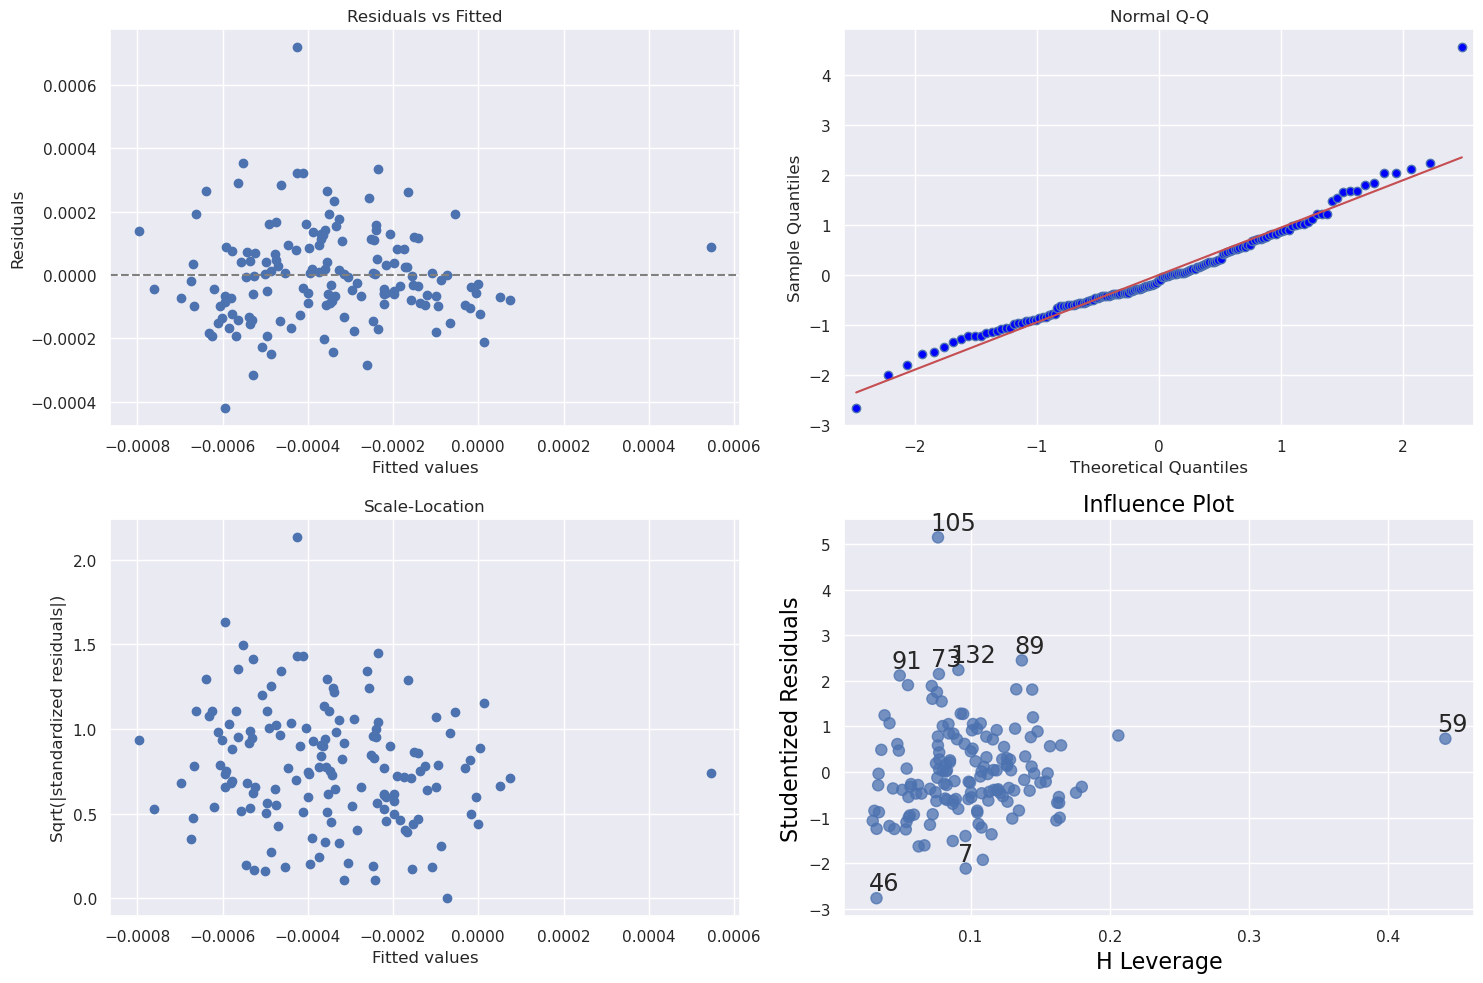

In [28]:
## plot
sns.set(font_scale=1)
fig = plt.figure(figsize = (15, 10), dpi = 100)
 
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')
 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')
 
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')
 
ax4 = fig.add_subplot(2, 2, 4)
sns.set(font_scale=1)
sm.graphics.influence_plot(regression_model, criterion = 'Cooks', size = 0.5, ax = ax4)
 
plt.tight_layout()

In [29]:
outliers = regression_model.get_influence()
leverage = outliers.hat_matrix_diag
dffits = outliers.dffits[0]
resid_stu = outliers.resid_studentized_external
cook = outliers.cooks_distance[0]
contat1 = pd.concat([pd.Series(leverage,name = 'leverage'),pd.Series(dffits, name = 'dffits'),pd.Series(resid_stu, name = 'resid_stu'),pd.Series(cook, name = 'cook')],axis = 1)
data.index = range(data.shape[0])
profit_outliers = pd.concat([contat1],axis = 1)
pd.set_option('display.width',200)
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)
print(profit_outliers)

     leverage    dffits  resid_stu          cook
0    0.055614 -0.241179  -0.993854  3.635770e-03
1    0.050930 -0.090911  -0.392448  5.197879e-04
2    0.100117  0.151471   0.454118  1.442390e-03
3    0.081102 -0.076808  -0.258537  3.712624e-04
4    0.139203  0.137173   0.341109  1.183717e-03
5    0.066865 -0.431219  -1.610913  1.148716e-02
6    0.126078  0.115314   0.303597  8.366630e-04
7    0.096489 -0.692889  -2.120269  2.925408e-02
8    0.079202  0.454636   1.550160  1.278646e-02
9    0.076542  0.168145   0.584041  1.775648e-03
10   0.088447 -0.062124  -0.199439  2.429284e-04
11   0.108762 -0.673919  -1.929155  2.782855e-02
12   0.087743 -0.195550  -0.630537  2.400631e-03
13   0.038222  0.248150   1.244784  3.833162e-03
14   0.072581  0.449757   1.607703  1.249696e-02
15   0.082863 -0.184348  -0.613303  2.133804e-03
16   0.062259 -0.073706  -0.286049  3.418406e-04
17   0.131275 -0.157536  -0.405257  1.560692e-03
18   0.077455  0.124561   0.429883  9.755589e-04
19   0.109546  0.039

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:762: RuntimeWarning: divide by zero encountered in true_divide
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


In [45]:
data_final = data.drop(index=[25,46,59,105])

In [46]:
X = data_final[['clean_environ_por',
       'health_training_por', 'school_awareness_por', 'media_awareness_por',
       'sub_counselling_por', 'region_East of England', 'region_North East',
       'region_North West', 'region_South East', 'region_South West',
       'region_West Midlands', 'region_Yorkshire and the Humber',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county','local_authority_type_other_london']]
regression_model = sm.OLS(endog= data_final['ttl_case_diff'], exog=sm.add_constant(X)).fit()
regression_model.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ttl_case_diff   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.81e-24
Time:                        02:07:43   Log-Likelihood:                 1109.9
No. Observations:                 148   AIC:                            -2190.
Df Residuals:                     133   BIC:                            -2145.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.0002      0.000     -2.005      0.047      -0.000   -3.19e-06
clean_environ_por                               -0.0004      0.000     -2.125      0.035      -0.001   -2.62e-05
health_training_por                             -0.0006      0.000     -2.010      0.046      -0.001      -1e-05
school_awareness_por                             0.0003      0.000      1.611      0.110   -6.79e-05       0.001
media_awareness_por                             -0.0015      0.000     -6.069      0.000      -0.002      -0.001
sub_counselling_por                             -0.0009      0.000     -2.415      0.017      -0.002      -0.000
region_East of England                           0.0004   5.04e-05      7.178      0.000       0.000       0.000
region_North East                                0.0003   4.95e-05      5.325      0.000       0.000       0.000
region_North West                                0.0002    4.5e-05      3.967      0.000    8.95e-05       0.000
region_South East                                0.0004   4.13e-05      9.167      0.000       0.000       0.000
region_South West                                0.0004   4.35e-05      9.405      0.000       0.000       0.000
region_West Midlands                             0.0004   4.96e-05      7.507      0.000       0.000       0.000
region_Yorkshire and the Humber                  0.0003   4.91e-05      5.351      0.000       0.000       0.000
local_authority_type_metropolitan_borough       -0.0001   3.74e-05     -2.892      0.004      -0.000   -3.42e-05
local_authority_type_non_metropolitan_county     0.0001    3.3e-05      3.646      0.000    5.51e-05       0.000
local_authority_type_other_london                     0          0        nan        nan           0           0
==============================================================================
Omnibus:                        5.892   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.786
Skew:                           0.484   Prob(JB):                       0.0554
Kurtosis:                       3.033   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

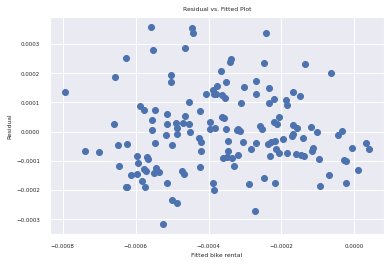

In [47]:
# plot 
plt.scatter(regression_model.fittedvalues, regression_model.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

In [48]:
results = pd.DataFrame({'index': data_final.ttl_case_diff,
                        'resids': regression_model.resid,
                        'std_resids': regression_model.resid_pearson,
                        'fitted': regression_model.fittedvalues
                       })
print(results.head()) 

      index    resids  std_resids    fitted
0 -0.000763 -0.000150   -1.062233 -0.000613
1 -0.000588 -0.000041   -0.287193 -0.000548
2 -0.000456  0.000059    0.416798 -0.000515
3 -0.000056 -0.000013   -0.089505 -0.000044
4 -0.000187  0.000033    0.233773 -0.000220


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


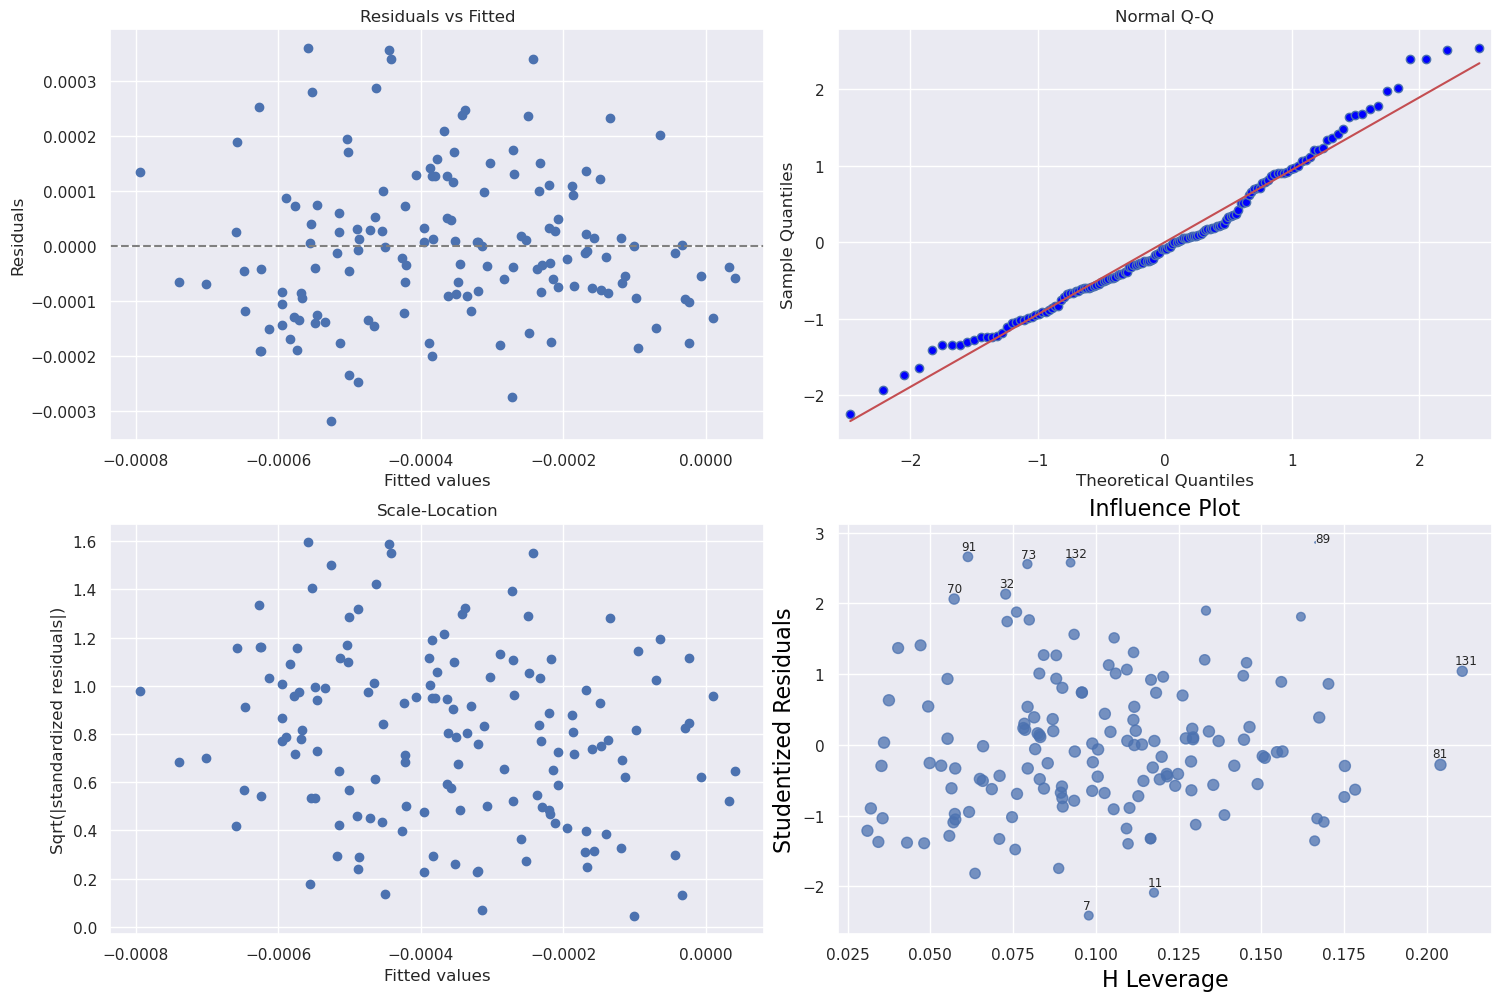

In [49]:
## plot
sns.set(font_scale=1)
fig = plt.figure(figsize = (15, 10), dpi = 100)
 
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')
 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')
 
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')
 
ax4 = fig.add_subplot(2, 2, 4)
sns.set(font_scale= 0.5)
sm.graphics.influence_plot(regression_model, criterion = 'Cooks', size =0.0000001, ax = ax4)
 
plt.tight_layout()

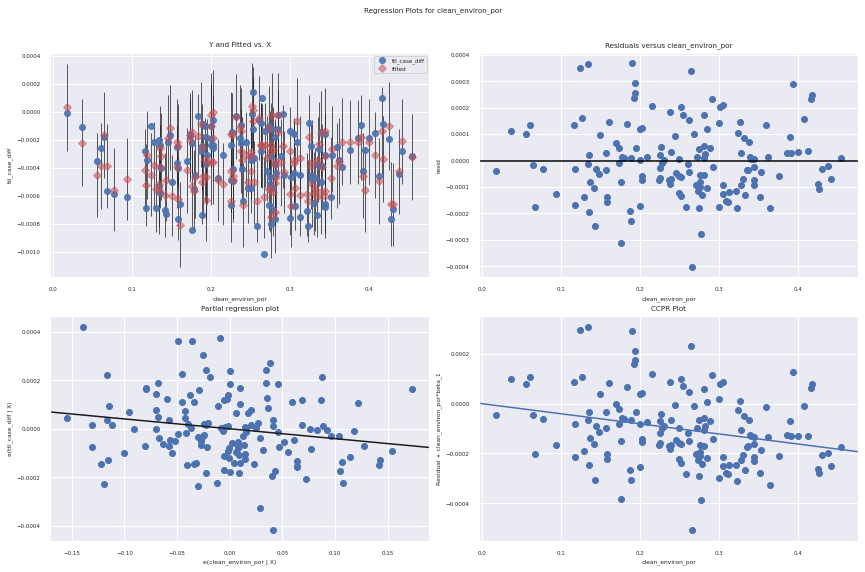

In [44]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regression_model, 'clean_environ_por', fig=fig)